# MODEL BUILDING

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

<h5>Reading the prepared data set for model building</h5>

In [2]:
us_house_price_df = pd.read_csv("resultant_dataset.csv")
us_house_price_df.head()

,Unnamed: 0,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,Interest_rate,Income,Subsidy,popgrowth
0,6,128.461,2003,1,50462.000000,1.856353e+08,4.0,182.6,5.8,144.4,2.25,65860.0,25.93,0.859482
1,7,129.355,2003,2,50573.333333,1.858697e+08,4.5,183.6,5.9,145.2,2.25,65860.0,25.93,0.859482
2,8,130.148,2003,3,50684.666667,1.860851e+08,4.1,183.9,5.9,145.2,2.25,65860.0,25.93,0.859482
3,9,130.884,2003,4,50796.000000,1.864708e+08,4.1,183.2,6.0,145.9,2.25,65860.0,25.93,0.859482
4,10,131.735,2003,5,51034.666667,1.866491e+08,3.9,182.9,6.1,145.8,2.25,65860.0,25.93,0.859482


In [3]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

In [4]:
us_house_price_df.drop(columns = ["Unnamed: 0"], inplace = True)

# Exploratory Data Analysis

In [5]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,Interest_rate,Income,Subsidy,popgrowth
count,224.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,172.648402,56809.372024,1.996746e+08,6.014732,225.821647,6.168750,203.940737,1.946429,68489.285714,33.772946,0.766336
std,29.134351,3452.914043,6.111135e+06,1.918077,23.202246,2.013677,30.413730,1.732351,4419.886920,5.122477,0.187119
min,128.461000,50462.000000,1.856353e+08,3.300000,182.600000,3.500000,144.400000,0.250000,63350.000000,25.930000,0.156747
25%,147.909250,54375.250000,1.959485e+08,4.700000,208.327000,4.700000,183.850000,0.750000,65740.000000,29.512000,0.716722
50%,169.575500,55626.333333,2.014382e+08,5.500000,228.651500,5.600000,205.950000,1.000000,66780.000000,33.283000,0.736217
75%,185.992750,59243.000000,2.053578e+08,6.750000,242.882250,7.625000,216.325000,2.500000,71152.500000,36.215750,0.925484
max,266.845000,64960.333333,2.069919e+08,12.200000,272.870000,14.700000,315.700000,6.250000,78250.000000,45.299000,0.964348


In [6]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,Interest_rate,Income,Subsidy,popgrowth
CSUSHPISA,1.000000,0.872257,0.547717,-0.099524,0.684929,-0.448526,0.756636,0.121913,0.906631,0.738057,-0.491821
Per_Capita_GDP,0.872257,1.000000,0.840511,-0.169797,0.915824,-0.390493,0.905460,-0.177573,0.852784,0.888411,-0.711533
Working_Population,0.547717,0.840511,1.000000,-0.006695,0.964436,-0.028513,0.876094,-0.479738,0.554485,0.878817,-0.626968
Houses,-0.099524,-0.169797,-0.006695,1.000000,-0.079524,0.151598,-0.024395,0.129999,-0.158718,-0.114092,0.210898
CPI,0.684929,0.915824,0.964436,-0.079524,1.000000,-0.069002,0.953584,-0.470551,0.678423,0.952660,-0.702209
UNRATE,-0.448526,-0.390493,-0.028513,0.151598,-0.069002,1.000000,-0.081427,-0.553533,-0.445038,0.010767,0.213918
Cons_Materials,0.756636,0.905460,0.876094,-0.024395,0.953584,-0.081427,1.000000,-0.411224,0.673511,0.928134,-0.753256
Interest_rate,0.121913,-0.177573,-0.479738,0.129999,-0.470551,-0.553533,-0.411224,1.000000,0.043368,-0.473783,0.355481
Income,0.906631,0.852784,0.554485,-0.158718,0.678423,-0.445038,0.673511,0.043368,1.000000,0.754313,-0.497443
Subsidy,0.738057,0.888411,0.878817,-0.114092,0.952660,0.010767,0.928134,-0.473783,0.754313,1.000000,-0.655079


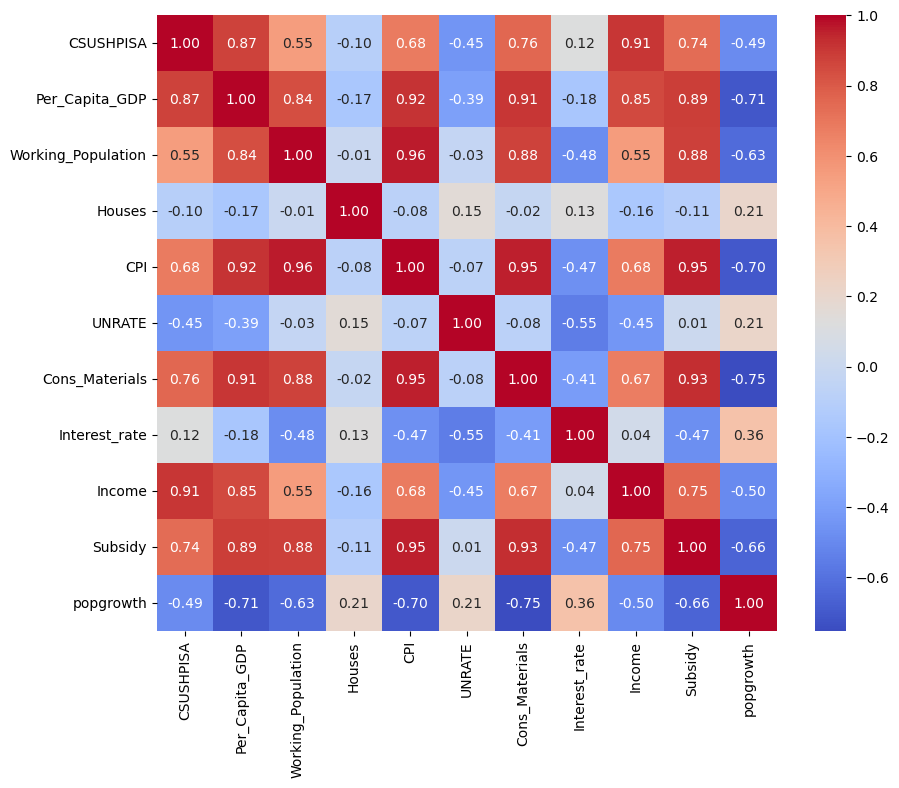

In [7]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
us_house_price_df.columns


Index(['CSUSHPISA', 'Per_Capita_GDP', 'Working_Population', 'Houses', 'CPI',
       'UNRATE', 'Cons_Materials', 'Interest_rate', 'Income', 'Subsidy',
       'popgrowth'],
      dtype='object')

<Figure size 1300x800 with 0 Axes>

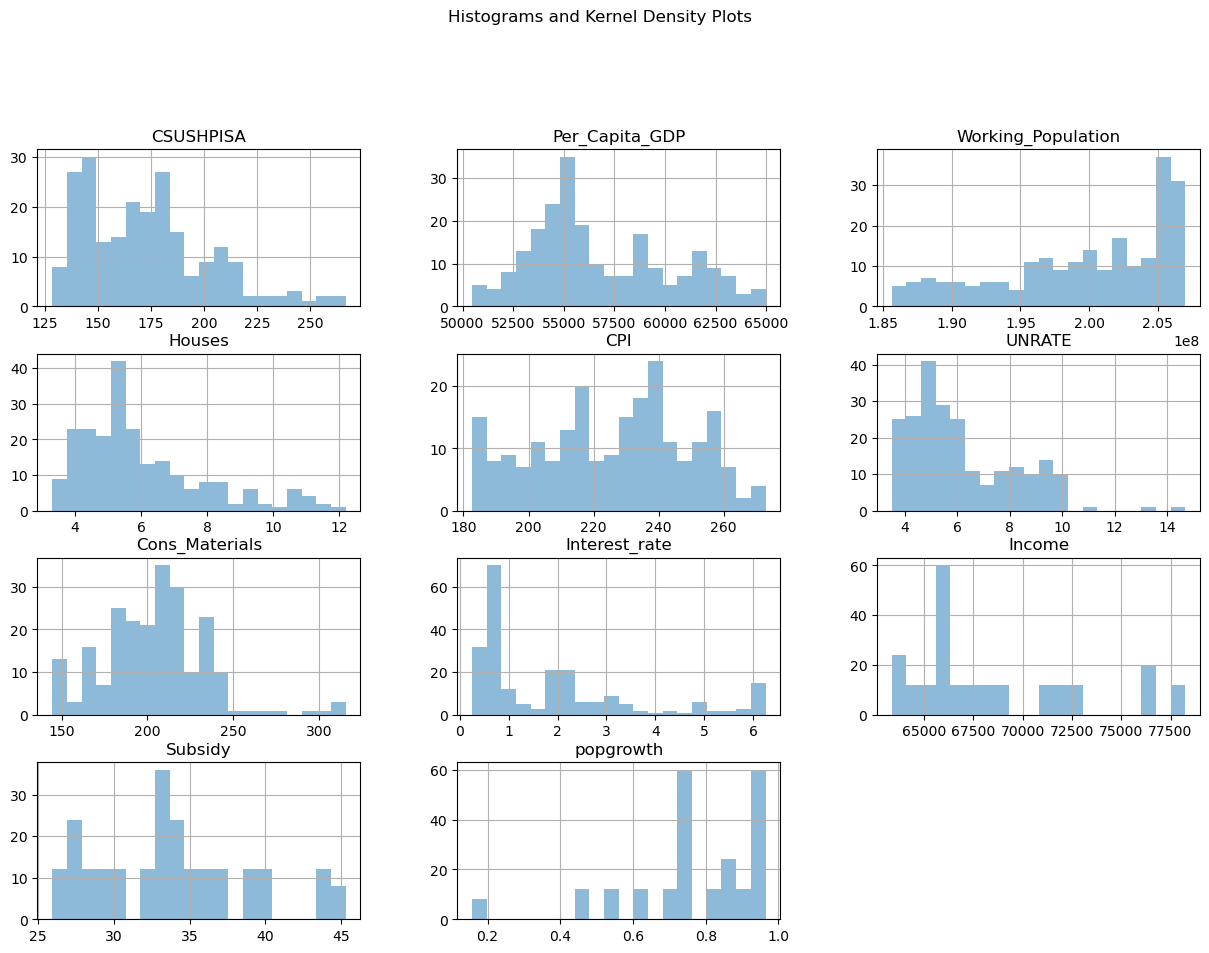

In [9]:

#Histograms and Kernel Density Plots

factors = ['CSUSHPISA', 'Per_Capita_GDP', 'Working_Population', 'Houses', 'CPI', 'UNRATE',
           'Cons_Materials', 'Interest_rate', 'Income', 'Subsidy', 'popgrowth']

plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 3), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()



<h5>Splitting Target and Features</h5>

In [10]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

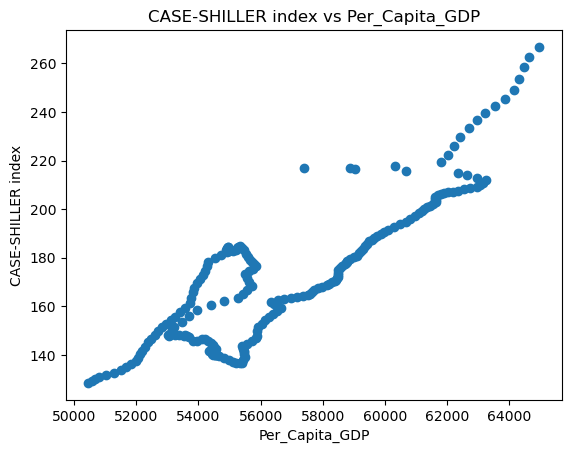

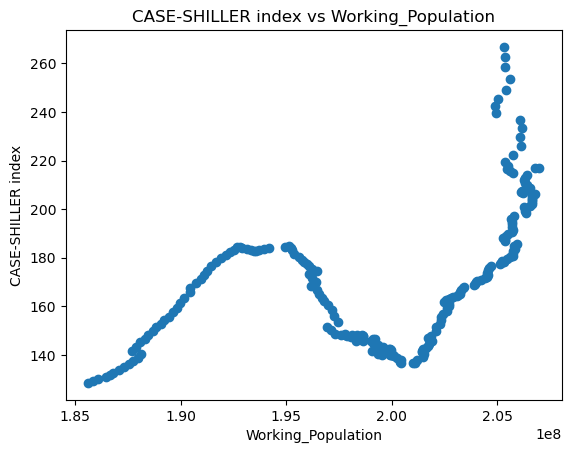

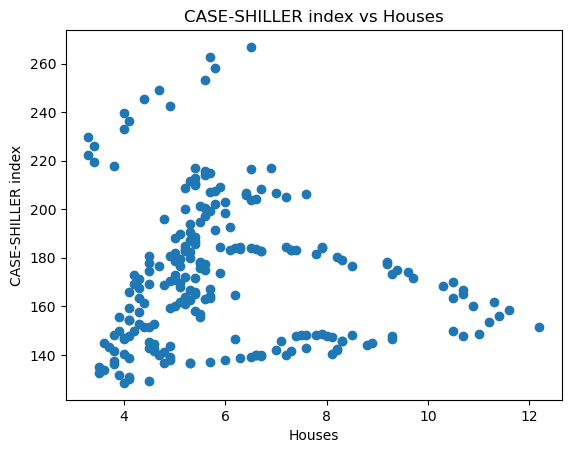

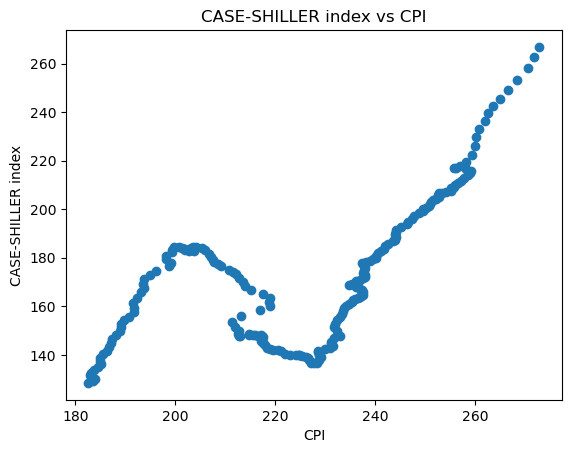

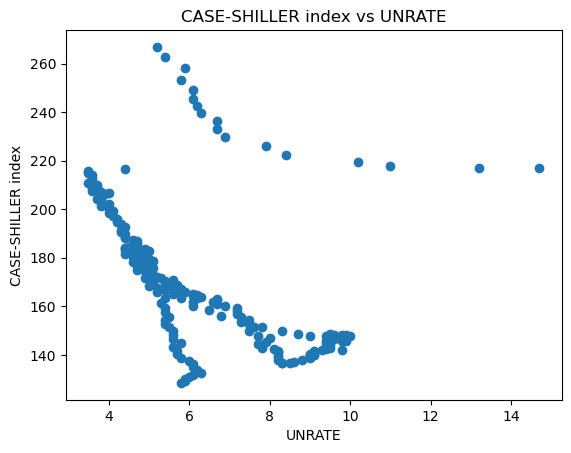

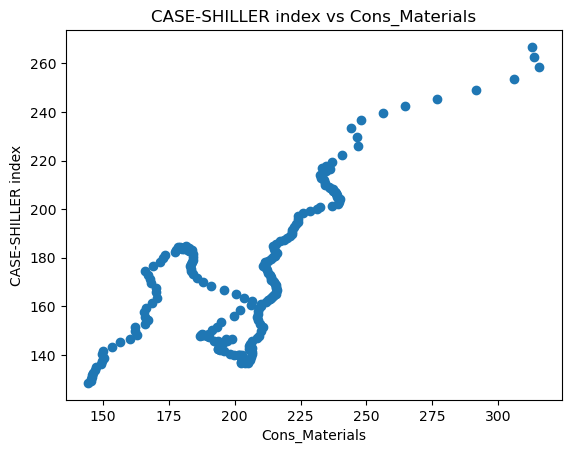

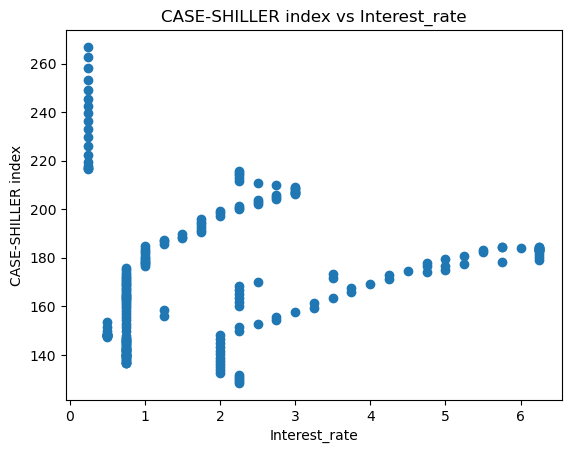

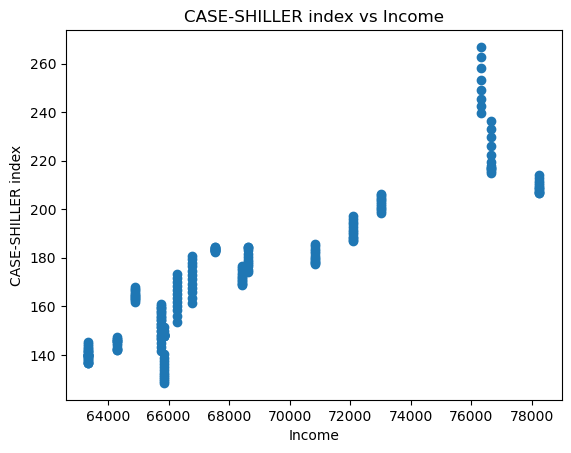

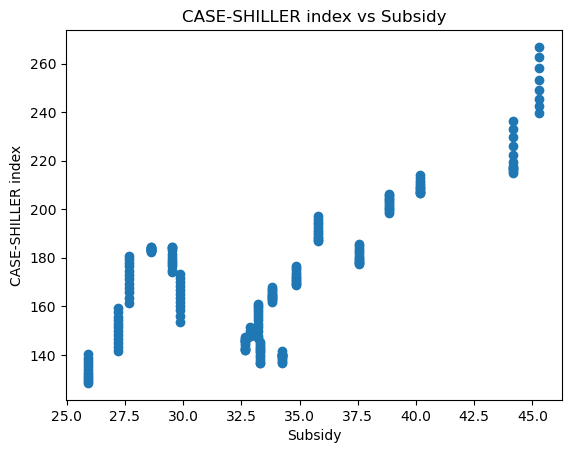

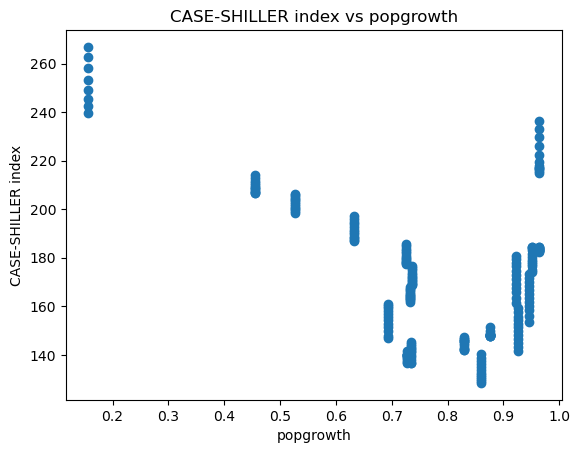

In [11]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")
    plt.show()

<h5>CORRELATION</h5>

In [13]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Houses                0.099524
Interest_rate         0.121913
UNRATE                0.448526
popgrowth             0.491821
Working_Population    0.547717
CPI                   0.684929
Subsidy               0.738057
Cons_Materials        0.756636
Per_Capita_GDP        0.872257
Income                0.906631
dtype: float64


<h4>Summary of Correlations:</h4>

<h5>Strong Positive Correlation:</h5>
<h6>Features with high positive correlation coefficients:</h6>
    
    'Income' (0.906631)<br>
    'Per_Capita_GDP' (0.872257)<br>
    'Cons_Materials' (0.756636)<br>
    'Subsidy' (0.738057)<br>
    'CPI' (0.684929)
<p>These features have a strong positive linear relationship with the target variable (assuming it's positive).</p>

<h5>Moderate Positive Correlation:</h5>
<h6>Features with moderate positive correlation coefficients:</h6>
    
    'Working_Population' (0.547717)<br>
    'popgrowth' (0.491821)<br>
    'UNRATE' (0.448526)
    'Interest_rate' (0.121913)
<p>These features show a moderate positive linear relationship with the target variable.</p>
<h5>Low Correlation:<h5>
    
    'Interest_rate' (0.121913)
    'Houses' (0.099524)
<p>'Houses' has a relatively low positive correlation coefficient (0.099524), indicating a weak positive linear relationship with the target variable.</p>

In [14]:
mult_cols = ["Interest_rate", "Houses"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [15]:
X

,Per_Capita_GDP,Working_Population,CPI,UNRATE,Cons_Materials,Income,Subsidy,popgrowth
0,50462.000000,1.856353e+08,182.600,5.8,144.400,65860.0,25.930,0.859482
1,50573.333333,1.858697e+08,183.600,5.9,145.200,65860.0,25.930,0.859482
2,50684.666667,1.860851e+08,183.900,5.9,145.200,65860.0,25.930,0.859482
3,50796.000000,1.864708e+08,183.200,6.0,145.900,65860.0,25.930,0.859482
4,51034.666667,1.866491e+08,182.900,6.1,145.800,65860.0,25.930,0.859482
...,...,...,...,...,...,...,...,...
219,64157.000000,2.053905e+08,266.670,6.1,291.800,76330.0,45.299,0.156747
220,64309.666667,2.056115e+08,268.444,5.8,305.900,76330.0,45.299,0.156747
221,64462.333333,2.053766e+08,270.559,5.9,315.700,76330.0,45.299,0.156747
222,64615.000000,2.053441e+08,271.764,5.4,313.542,76330.0,45.299,0.156747


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    
}

In [26]:
# Fit, train, test, and evaluate each model
for name, model in models.items():
    # Fit the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Predict the target variable on the scaled test data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    
    # Display evaluation metrics
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Explained Variance: {explained_var}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error: 40.78863634144546
R-squared: 0.9488077551424074
------------------------------
Model: Random Forest
Mean Squared Error: 3.0789426826733535
R-squared: 0.9961357377482671
------------------------------
Model: Gradient Boosting
Mean Squared Error: 3.2624160573950305
R-squared: 0.9959054673895089
------------------------------


<h4>Linear Regression:</h4>

<b>Mean Squared Error (MSE): 40.79<br>
   R-squared (R2): 0.949</b>
<p>The Linear Regression model has a higher MSE compared to the other models, indicating that the predicted values deviate more from the actual values. The R-squared value of 0.949 suggests that approximately 94.9% of the variability in the target variable is explained by the model.</p>

<h4>Random Forest:</h4>

<b>Mean Squared Error (MSE): 3.08<br>
   R-squared (R2): 0.996</b>
<p>The Random Forest model has a significantly lower MSE than Linear Regression, suggesting better predictive performance. The high R-squared value (close to 1) indicates that the model explains a very high percentage (99.6%) of the variability in the target variable.</p>

<h4>Gradient Boosting:</h4>

<b>Mean Squared Error (MSE): 3.26<br>
   R-squared (R2): 0.996</b>
<p>The Gradient Boosting model performs similarly to Random Forest, with a low MSE and high R-squared value.</p> 
<h5>Both Random Forest and Gradient Boosting seem to provide very accurate predictions on the test data.</h5>

Feature importances not available for Linear Regression.
Model: Random Forest
Feature Importances:
Income: 0.3734241347301534
Cons_Materials: 0.29784357518469623
CPI: 0.17418664476756246
Per_Capita_GDP: 0.07037809189252046
UNRATE: 0.039973272330364615
Subsidy: 0.01814878969748906
popgrowth: 0.015139035928655504
Working_Population: 0.010906455468558385


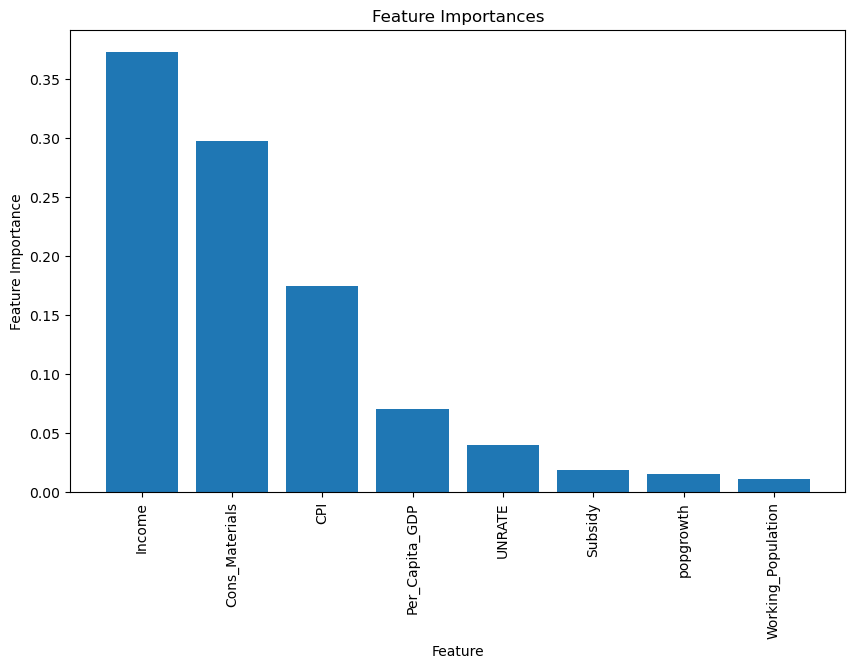

----------------------------------------------------------------------------------------------------
Model: Gradient Boosting
Feature Importances:
Income: 0.3868411162206395
CPI: 0.258377426851827
Cons_Materials: 0.2520772003857674
UNRATE: 0.06276909180980478
Per_Capita_GDP: 0.02482087102793873
Working_Population: 0.008157862325432754
Subsidy: 0.0045699416137199664
popgrowth: 0.0023864897648698796


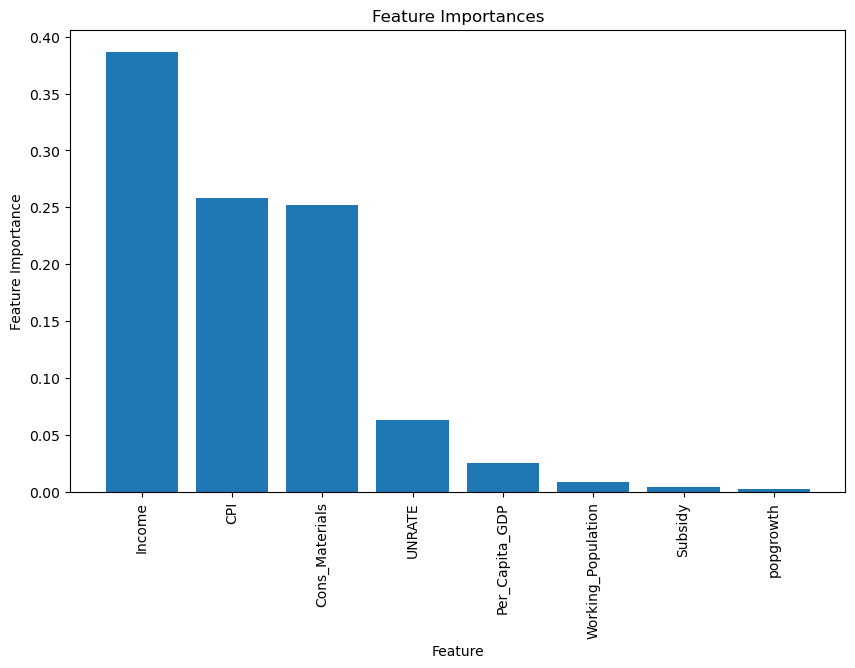

----------------------------------------------------------------------------------------------------


In [23]:
import matplotlib.pyplot as plt

# Fit, train, test, and evaluate each model
for name, model in models.items():
    # Fit the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Display feature importances for models that support it
    if hasattr(model, 'feature_importances_'):
        print(f"Model: {name}")
        print("Feature Importances:")
        
        # Extract feature importances
        feature_importances = model.feature_importances_
        feature_names = X_train.columns
        
        # Sort feature importances in descending order
        indices = feature_importances.argsort()[::-1]
        sorted_feature_importances = feature_importances[indices]
        sorted_feature_names = feature_names[indices]
        
        # Print feature importances
        for feature, importance in zip(sorted_feature_names, sorted_feature_importances):
            print(f"{feature}: {importance}")
        
        # Plotting the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
        plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Feature Importance')
        plt.title('Feature Importances')
        plt.show()
        
        print("-" * 100)
    else:
        print(f"Feature importances not available for {name}.")
